<center><img src="https://raw.githubusercontent.com/shrutisaxena0617/Machine_Learning/master/images/data-banner-copy.jpg"></center>

<h1><center> Twitter Sentiment Analysis </center></h1>

<h2><font size="4" color="grey"><center> BAX423 Data Design and Representation | Final Project </center></font></h2>
<h3><font size="3" color="grey"><center> MS Business Analytics, University of California, Davis (2017-18) </center></font></h3>

1. [Part 1: Relational Data](#1) <br>
2. [Part 2: JSON, Data Streaming](#2)<br>
3. [Part 3: Text Data](#3) <br>
4. [References](#4) <br>

# Part 1 Relational Data <a class="anchor" id="1"></a>

## Summary of the business problem
Jones Dozers is a construction equipment company which needs to keep track of the manufactured equipment and respective transactions. The company needs to build a relational database (as relational database systems work the best for any business transaction data processing) which will store the information on equipment it makes, rentals and sales of the equipment, customers who rent or buy the equipment and the sales reps who conduct the rent or sale transactions.

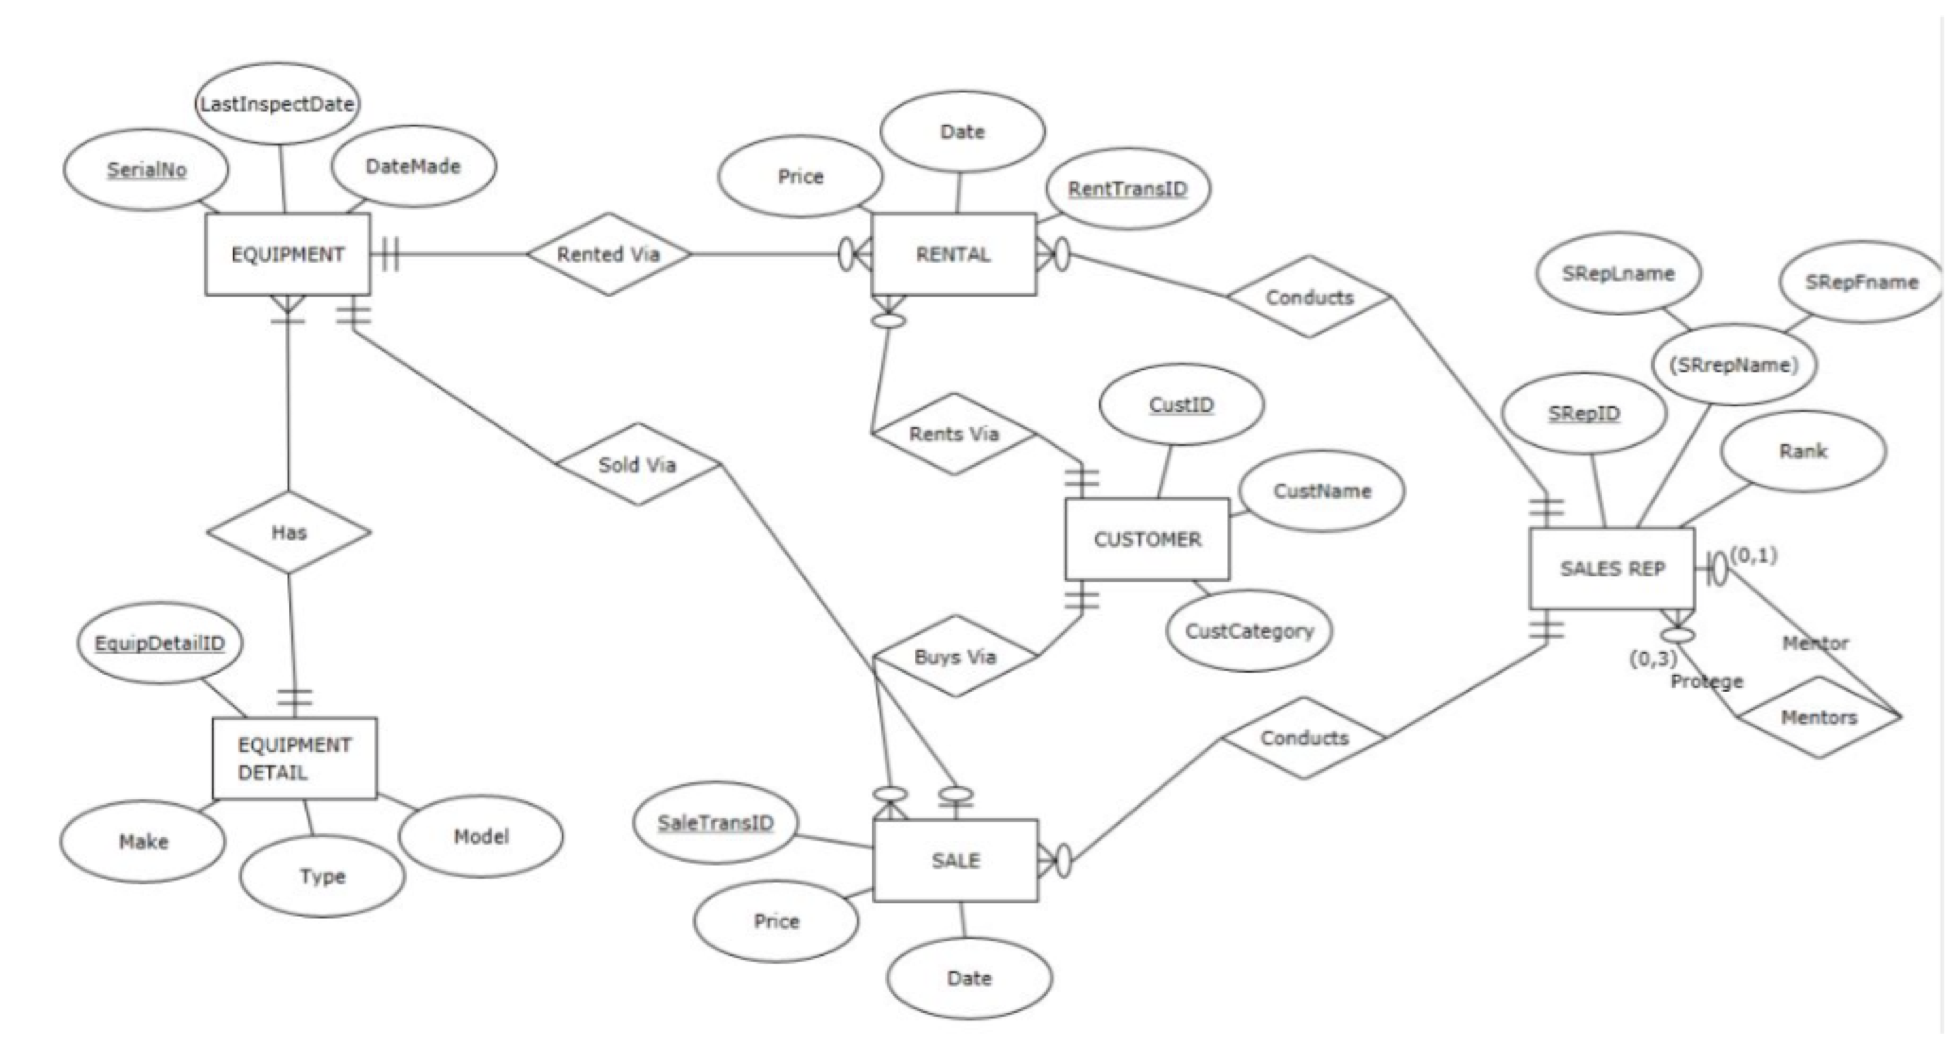

## Solution details 1: Requirements for the ER diagram for the Jones Dozers Sales and Rentals Database shown above:
*	The Jones Dozers Sales and Rentals Database (DB) will keep track of the equipment it makes, rentals and sales of the equipment, customers who rent or buy the equipment and the sales reps who conduct the rent or sale transactions.
*	For each piece of equipment, the DB will keep track of the unique equipment serial number, date when the equipment was made and the last inspection date.
*	For each equipment detail, the DB will keep track of a unique equipment detail identifier, the equipment detail make, type and model
*	For each customer, the DB will keep track of the unique customer identifier, the customer name and customer category
*	For each sales rep, the DB will keep track of a unique sales rep identifier, the sales rep name which is composed of a first and last name, and the sales rep rank.
*	For each rental, we will keep track of a unique rental transaction identifier, date of the rental, and the total price of the rental
*	For each sale, we will keep track of the unique sales transaction identifier, the sale date and price.
*	Each piece of equipment has one equipment detail. Each equipment detail applies to at least one piece of the equipment, but can apply to many.
*	An equipment is rented via a rental. An equipment may not be rented or can be rented through many rentals (same equipment can be rented out multiple times). But each rental will contain one and only one equipment.
*	An equipment is sold via a sale. An equipment may not be sold or can be sold only once. Each sale should contain one and only one equipment.
*	A customer can rent an equipment via a rental. A customer can rent via multiple rental transactions or may not have any rental transactions. A rental transaction should be done by one and only one customer. 
*	A customer can buy an equipment via a sale. A customer can buy via multiple sales transactions or may not have any sale transaction. A sale should be done by one and only one customer. 
*	A sales rep conducts a rental. A sales rep can conduct multiple rentals or none. A rental has to be conducted by one and only one sales rep.
*	A sales rep conducts a sale. A sales rep can conduct multiple sale transactions or none. A sale transaction has to be conducted by one and only one sales rep.
*   A sales rep (Mentor) can mentor other sales reps (Protégé). A sales rep can be a mentor to up to 3 other sales reps or to none. A sales rep can have one mentor or none.

## Solution details 2: Relational schema mapped to the ER diagram

Link to the ERD Plus Schema file - https://github.com/p-sama/Data-Design/blob/master/423-FinalProject-JD.erdplus <br>
Also, pasted as image below:
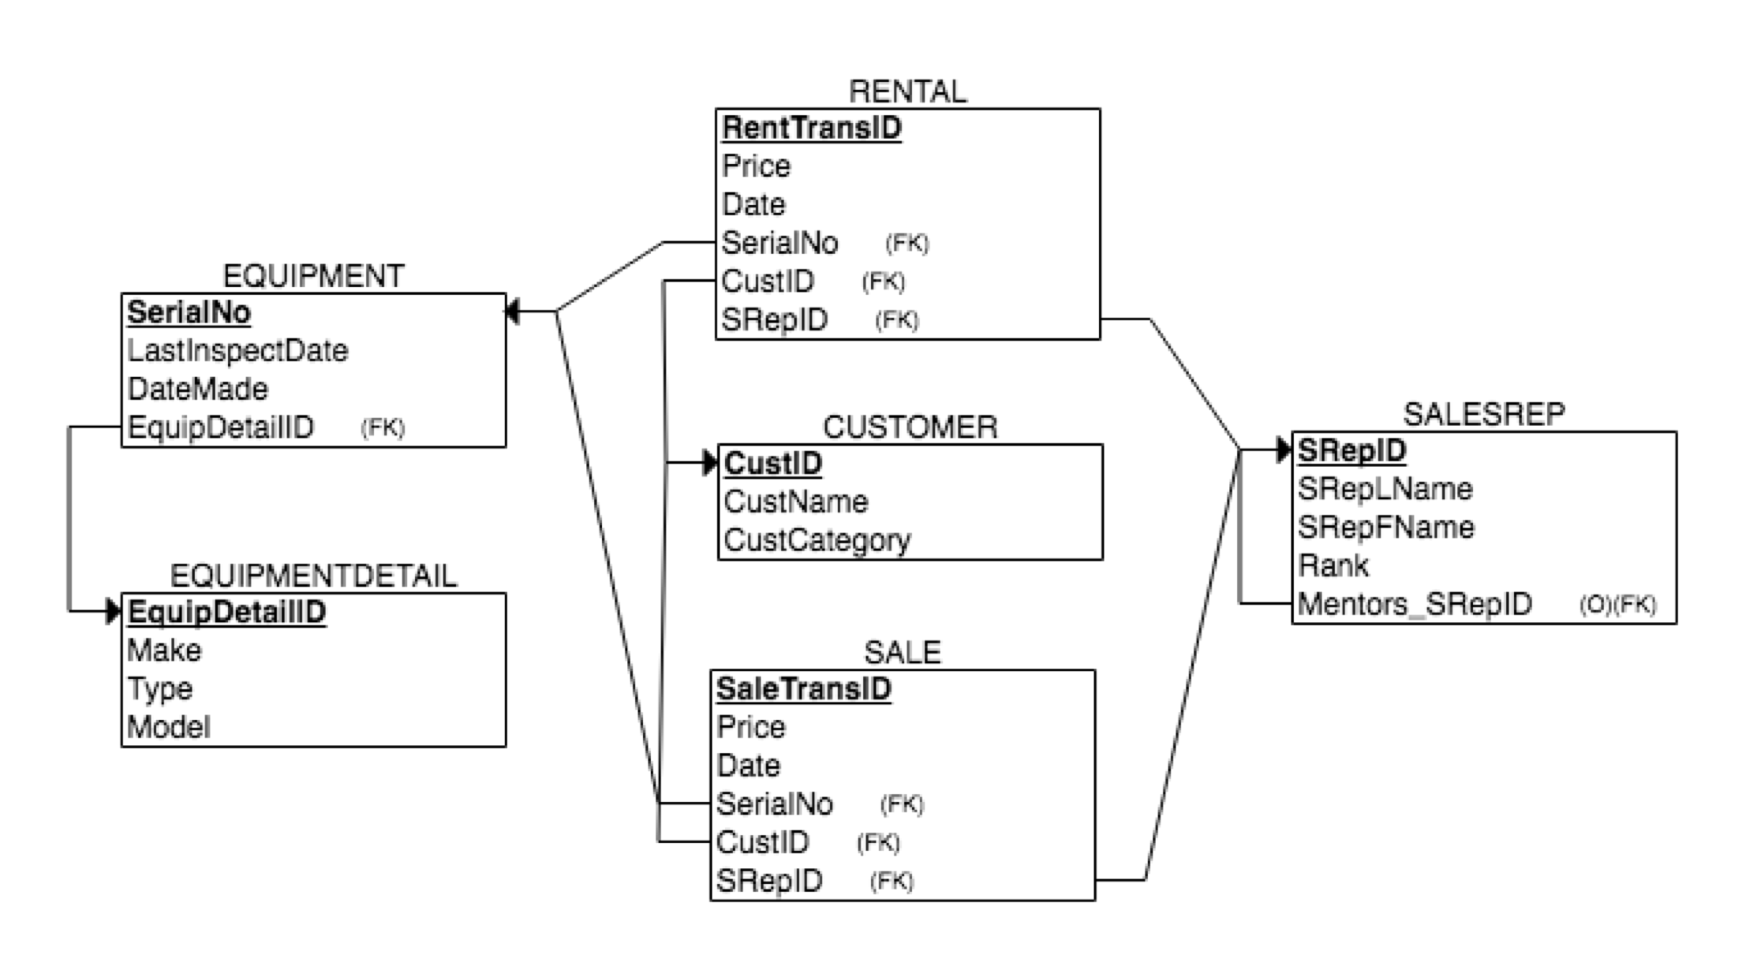

## Summary of the solution and key highlights:
We resorted to Entity-Relationship (ER) modeling for conceptualizing the database model. We used the online platform, ERDplus.com. The first step was to identify each entity to track, their attributes (unique and others) and relationship (along with type of relationship) between entities (including self). Once the ER diagram was built, the next step was to create a relational schema to identify the structure of each table to be included in the actual database. Once the model is finalized, the final step is to identify the choice of the database system (MySQL, BigQuery, SQLServer, etc.) and use SQL codes to insert, update or query the database. Such data models also serve as building blocks in creating analytical databases to analyze the sales, revenue and inventory data to produce business insights and help them make more data-driven decisions. A dimensional model for a data warehouse can be easily created using this database.

## Key learnings:
* ERDs can be useful in understanding the data elements involved in a project suitable for relational database systems and how they work together
* Reverse-engineering the ER diagram can help in requirements collection process
* Model the data in terms of the different types/categories of data and their relationships to each other
* Understand the level of the data, reveal ambiguities and identify the constraints of the data
* Provide a model for the actual database design
* Facilitate building codes for easy storage and retrieval of data
* Pave the way for analytical projects

# Part 2 JSON, Data Streaming <a class="anchor" id="2"></a>

## Summary of the business problem
* Find any data streaming service with JSON data streaming (e.g. Twitter Stream - see the following link for reference - http://docs.tweepy.org/en/v3.6.0/streaming_how_to.html)
* Understand the data model and JSON representation used in the data stream
* Write Python code to connect to the data streaming service to receive a limited data feed
* Parse the JSON data and load it into a relational database

## Solution details: Using Tweepy API to stream real-time tweets from Twitter
* **About Tweepy**

Current version: 3.6.0

Tweepy is an open-sourced library which can be used with python to communicate with Twitter platform and its various API. With tweepy, it is possible to get any object and use any method that the official Twitter API offers, for instance, user, status etc.


In this part of the project, we will use Tweepy’s StreamingAPI to capture real-time tweets based on some tags (filters) in an asynchronous call and save the data to a relational database using sqlite3 library.  

   ** Authentication Steps:**

  * **STEP 1**: Create an app at https://apps.twitter.com/app/new. Refer https://developer.twitter.com/en/docs/basics/getting-started#get-started-app for more documentation
  
<center><img src='https://raw.githubusercontent.com/shrutisaxena0617/Machine_Learning/master/images/pic1.png' width = "400"/></center>

  * **STEP 2**: Once the app is successfully created, get key and access token
  
<center><img src='https://raw.githubusercontent.com/shrutisaxena0617/Machine_Learning/master/images/pic2.png' width = "400"/></center>

<center><img src='https://raw.githubusercontent.com/shrutisaxena0617/Machine_Learning/master/images/pic3.png' width = "400"/></center>

  * **STEP 3**: Authentication using OAuth
  
<center><img src='https://raw.githubusercontent.com/shrutisaxena0617/Machine_Learning/master/images/pic4.png' width = "500"/></center>
  
  
* **Fascinating features**

Twitter streaming API is used to download tweets in real time. It is useful for obtaining a high volume of tweets, or for creating a live feed using a site stream or user stream. It is significantly different from REST api because the REST api is used to pull data from twitter but the streaming api pushes messages to a persistent session. This allows the streaming api to download more data in real time than could be done using the REST API.

Moreover, in this project, the way we have used the StreamingAPI is by calling it asynchronously, which increases the performance of this program significantly. If done otherwise, the main thread will have to wait for the streaming execution to complete and the way this has been designed is that it does not disconnect automatically. This means an external interruption is needed for disconnection like a KeyBoard interrupt, hence delaying the steps thereafter. Moreover, asynchronous implementation allows for parallel processing.

* **Data Model and JSON Representation**

We studied the Twitter JSON response object and structure here - https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json.html. Following is the fundamental structure of a Twitter object.

<center><img src='https://raw.githubusercontent.com/shrutisaxena0617/Machine_Learning/master/images/Twitter_object_fundamental.png' width = "400"/></center>

There are several other entities and sub-attributes in the JSON object for instance for user for instance name, description, followers_count, location, geo, statuses_count etc. In this project, we have selected few attributes related to two entities - 'user' and 'tweet' and build the following relational schema:

<center><img src='https://raw.githubusercontent.com/shrutisaxena0617/Machine_Learning/master/images/erdplus-diagram.png' width = "500"/></center>

## Code:

### STEP 1: Loading Dependencies

In [6]:
#!pip3 install tweepy
#!pip3 install -U -q PyDrive
#!pip3 install gsutil
#!pip3 install dataset
#!pip3 install textblob

In [2]:
import tweepy
import pandas as pd
import requests
import json
import sqlite3

### STEP 2: Create Database and tables

In [57]:
# Create twitter.db database and associated tables 
conn = sqlite3.connect('twitter.db', check_same_thread=False)
c = conn.cursor()

try:
    # create tables
    c.execute('''create table if not exists tweets (
        tweet_id integer,
        created_at text,
        tweet_text text,
        source text,
        user_id integer
    )''')
    c.execute('''create table if not exists users (
        user_id integer,
        name text,
        description text,
        follower_count integer,
        statuses_count integer
    )''')
    conn.close()
except Exception as e:
    print("Exception occured while creating tables %s" % e)
    conn.close()

### STEP 3: Connecting to Twitter API to receive real time tweets and push the data to database

In [1]:
# Access keys to connect to Twitter API
TWITTER_KEY = '2693355300-SKXNm8qxdkfdQJzR3paNvbge3n1DaJRVaHgYDxD'
TWITTER_SECRET = 'N7tw0btVqVMvNkAgyDesIfJLn0CRk6HjLdKHGZ3ymY6lU'
TWITTER_APP_KEY = 'PGouZB8NYgIjCo3uEM5URhMRH'
TWITTER_APP_SECRET = 'DAAbhNzrF7qSxsJIkxhCQGjELOx6MrXXuZXVeGGsTu74TrLVhe'

In [59]:
# Class for defining a Tweet
class Tweet():

    # Data on the tweet
    def __init__(self, id, created_at, text, source, user_id):
        self.id = id
        self.created_at = created_at
        self.text = text
        self.source = source
        self.user_id = user_id

    # Inserting that data into the DB
    def insert_tweet(self, c):
        try:
            c.execute('INSERT INTO tweets (tweet_id, created_at, tweet_text, source, user_id) VALUES (?, ?, ?, ?, ?)',
                (self.id, self.created_at, self.text, self.source, self.user_id))
            return self.id
        except Exception as e:
            print("Exception occured in insert_tweet() %s" % e)
            
# Class for defining a User
class User():

    # Data on the user
    def __init__(self, user_id, name, description = None, follower_count = 0, statuses_count = 0):
        self.user_id = user_id
        self.name = name
        self.description = description
        self.follower_count = follower_count
        self.statuses_count = statuses_count

    # Inserting that data into the DB
    def insert_user(self, c):
        try:
            c.execute("INSERT INTO users (user_id, name, description, follower_count, statuses_count) VALUES (?, ?, ?, ?, ?)",
                (self.user_id, self.name, self.description, self.follower_count, self.statuses_count))
            return self.user_id
        except Exception as e:
            print("Exception occured in insert_user() %s" % e)

In [60]:
# Our implementation of Tweepy's StreamListener class
class MyListener(tweepy.StreamListener):

    # Our function to create database connection
    def create_connection(self):
        self.conn = sqlite3.connect('twitter.db', check_same_thread=False)
        self.c = self.conn.cursor()

    # StreamListener class function implementation to display error if a connection issue occurs
    def on_error(self, status):
        print('error is')
        print(status)
        if status == 420:
            return False

    # StreamListener class function implementation to get twwets in real time
    def on_status(self, status):
        print('incoming')
        self.tweet = json.loads(json.dumps(status._json))
        print("------------------------------")
        print(self.tweet)
        self.insert_data(self.tweet)
        print("------------------------------")

    # Our helper function
    def insert_data(self, tweet):
        try:
            print('Inside insert_data')
            tweet_id = self.insert_tweet_data(tweet)
            user_id = self.insert_user_data(tweet)
            #self.insert_tweet_user_data(tweet_id, user_id)
            print("Committing :: ")
            self.conn.commit()
        except Exception as e:
            print('Exception occured while inserting records in db :: %s' % e)
            self.conn.rollback()

    # Our function to insert user data
    def insert_tweet_data(self, tweet):
        user = tweet.get('user')
        if user:
            t = Tweet(tweet['id'], tweet['created_at'], tweet['text'], tweet.get('source') or '', user['id'])
            return t.insert_tweet(self.c)

    # Our function to insert tweet data
    def insert_user_data(self, tweet):
        user = tweet.get('user')
        if user:
            u = User(user['id'], user['name'], user.get('description') or '', user.get('followers_count') or 0, user.get('statuses_count') or 0)
            return u.insert_user(self.c)

    # Our function to close databse connection
    def connection_close(self):
        self.conn.close()

# Authentication steps to connect to the Twitter API using OAuth
auth = tweepy.OAuthHandler(TWITTER_APP_KEY, TWITTER_APP_SECRET)
auth.set_access_token(TWITTER_KEY, TWITTER_SECRET)

api = tweepy.API(auth)
mylistener = MyListener()
mylistener.create_connection()

# Connect to the stream of tweets 
twitter_stream = tweepy.Stream(auth, mylistener)
twitter_stream.filter(track=['avengersinfinitywar', 'deadpool2'], languages=["en"], async = True)

incoming
------------------------------
{'created_at': 'Thu May 31 05:17:54 +0000 2018', 'id': 1002056554797977601, 'id_str': '1002056554797977601', 'text': '@namu_ram you need to decide.. https://t.co/WQDW9jdoIj', 'display_text_range': [0, 30], 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 147837724, 'in_reply_to_user_id_str': '147837724', 'in_reply_to_screen_name': 'namu_ram', 'user': {'id': 2556978238, 'id_str': '2556978238', 'name': 'ghansham kamath', 'screen_name': 'GhannuKamath', 'location': 'Bengaluru South, India', 'url': None, 'description': "fill in the blanks.. yes that's what I am when you know me. I can be good, bad or politician. depends on how and why you know me.", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 11, 'friends_count': 40, 'listed_count': 0, 'favourites_count': 

incoming
------------------------------
{'created_at': 'Thu May 31 05:18:38 +0000 2018', 'id': 1002056737719861249, 'id_str': '1002056737719861249', 'text': 'RT @vivekdahiya08: One of the rare times when you enjoy the Hindi trailer as much or actually more than the English one! Love that the tran…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1001687938147799041, 'id_str': '1001687938147799041', 'name': 'Piyali', 'screen_name': 'Piyali57721558', 'location': 'कोलकाता, भारत', 'url': None, 'description': 'This is the first step toward becoming better then you are', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1, 'friends_count': 8, 'listed_count': 0, 'favourites_count': 138, 'statuses_count': 115, 'creat

incoming
------------------------------
{'created_at': 'Thu May 31 05:18:44 +0000 2018', 'id': 1002056762890117121, 'id_str': '1002056762890117121', 'text': 'NEW EP&gt; #111 Time for #mcmcomiccon #MCMLondonComicCon as we bring panels with @iamtaylorgray @RealKevinConroy… https://t.co/awIKrMiHn9', 'source': '<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1308062562, 'id_str': '1308062562', 'name': '365Flicks Podcast', 'screen_name': '365FlicksPod', 'location': 'Berwick-upon-Tweed, England', 'url': 'https://itunes.apple.com/gb/podcast/365flicks-podcast/id1030800334?mt=2', 'description': 'The 365FlicksPodcast where we talk all things Movie, TV, Comics and Games. #PodernFamily #BritPodScene A UK Top20 Film and TV Podcast', 'translator_type': 'none', 'protected': False, 'ver

incoming
------------------------------
{'created_at': 'Thu May 31 05:18:53 +0000 2018', 'id': 1002056803054596097, 'id_str': '1002056803054596097', 'text': 'Who did this?? 😂😂\n\n#avengers #InfinityWar #AvengersInfinityWar #thanos #gamora #movie #theater #snacks #howmuch… https://t.co/AlIZYMSIO5', 'display_text_range': [0, 140], 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 760084764082606080, 'id_str': '760084764082606080', 'name': 'Hyde Hooligans', 'screen_name': 'HydeHooligans', 'location': 'Los Angeles, CA', 'url': 'http://www.hydehooliganfilms.com', 'description': 'Professional Indie Filmmakers specializing in narrative feature films. "We are the music-makers, And we are the dreamers of dreams." -Arthur O\'Shaughnessy', 'translator_type': '

incoming
------------------------------
{'created_at': 'Thu May 31 05:19:30 +0000 2018', 'id': 1002056957304307713, 'id_str': '1002056957304307713', 'text': 'RT @osro_o: ★INFINITYY FRIENDS★ #infinitywar #AvengersInfinityWar #Avengers #FANART https://t.co/SseL8F3dsf', 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1000511554213724160, 'id_str': '1000511554213724160', 'name': 'sena @new acc :(', 'screen_name': 'senabbunn', 'location': 'sena | f | 20 | adl, aus', 'url': 'https://www.instagram.com/senabbun/', 'description': 'previously @senabbun but twitter locked me out :( | illustration+animation student | aa/bnha/hq/rwby | vip/army | 💖💜💙', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 28, 'friends_count': 116, 'listed_count

In [61]:
# Close all open connections
mylistener.connection_close()
twitter_stream.disconnect()

In [62]:
# Reopen database connection from outside of class
conn = sqlite3.connect('twitter.db')

In [63]:
# Query data from tweets table
pd.read_sql_query("SELECT * from tweets limit 10", conn)

,tweet_id,created_at,tweet_text,source,user_id
0,1002056554797977601,Thu May 31 05:17:54 +0000 2018,@namu_ram you need to decide.. https://t.co/WQ...,"<a href=""http://twitter.com/download/android"" ...",2556978238
1,1002056578701381632,Thu May 31 05:18:00 +0000 2018,#AvengersInfinityWar problem - \nWhat happens ...,"<a href=""https://about.twitter.com/products/tw...",17895820
2,1002056737719861249,Thu May 31 05:18:38 +0000 2018,RT @vivekdahiya08: One of the rare times when ...,"<a href=""http://twitter.com/download/android"" ...",1001687938147799041
3,1002056762890117121,Thu May 31 05:18:44 +0000 2018,NEW EP&gt; #111 Time for #mcmcomiccon #MCMLond...,"<a href=""http://www.facebook.com/twitter"" rel=...",1308062562
4,1002056765494644736,Thu May 31 05:18:44 +0000 2018,#deadpool2 was just great. Make sure you watch...,"<a href=""http://twitter.com/download/iphone"" r...",963663128163749888
5,1002056786092830721,Thu May 31 05:18:49 +0000 2018,RT @sexyaleksandra: Who want free camsex with ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1172547452
6,1002056803054596097,Thu May 31 05:18:53 +0000 2018,Who did this?? 😂😂\n\n#avengers #InfinityWar #A...,"<a href=""http://twitter.com/download/iphone"" r...",760084764082606080
7,1002056919341715457,Thu May 31 05:19:21 +0000 2018,Thread! I will probably squander my twelve buc...,"<a href=""http://twitter.com/download/iphone"" r...",439309182
8,1002056957304307713,Thu May 31 05:19:30 +0000 2018,RT @osro_o: ★INFINITYY FRIENDS★ #infinitywar #...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1000511554213724160


In [64]:
# Query data from users table
pd.read_sql_query("SELECT * from users limit 10", conn)

,user_id,name,description,follower_count,statuses_count
0,2556978238,ghansham kamath,fill in the blanks.. yes that's what I am when...,11,17
1,17895820,Daily Express,http://Express.co.uk - Home of the Daily and S...,724622,540540
2,1001687938147799041,Piyali,This is the first step toward becoming better ...,1,115
3,1308062562,365Flicks Podcast,The 365FlicksPodcast where we talk all things ...,5112,23808
4,963663128163749888,MarcoCpolo,"Part time streamer, full time dreamer *csgo *p...",67,236
5,1172547452,Dude Thorny,Married man likes looking at pics of 18 & over...,198,9375
6,760084764082606080,Hyde Hooligans,Professional Indie Filmmakers specializing in ...,209,1551
7,439309182,Zina Petersen,Triage medievalist: contact for all your emerg...,700,15720
8,1000511554213724160,sena @new acc :(,previously @senabbun but twitter locked me out...,28,49


In [65]:
# Close database connection
conn.close()

## Summary of the solution and key highlights:

**Foundational Work**

We began with understanding the Twitter API in depth by reading through its documentation followed by Tweepy. We created a developer application named 'analyzing_tweets_123' and secured the requisite access tokens to connect with the API. We then understood the response json and data model of Twitter going through the object details and attributes, especially the different services and features available to query this data. 

**Data Model**

Based on our understanding of the response JSON, we designed a data model with two entities - 'user' and 'tweet' We used ERDPlus tool to create the relational schema with each table containing select fields from the response json.

**Code**

We used sqlite3 package to create a SQL database and the two tables. We then created classes for each entity and encapsulated functions with SQL queries to insert the data for class attributes to the database. On the API end, we used StreamListener service by Tweepy to receive real time streaming tweets on two tracks ('Avengers' and 'Deadpool2'). This API call was made asynchronously. Once we received sufficient data, we closed all the connections and re-established a database connection from outside of the class to query the two tables to test the pipeline

## Key learnings:

**Data**

* There is an enormous potential for analysis and a plethora of use cases based on Twitter's data especially as we learned from the different objects and attributes in the response json
* Ingesting the Twitter data in a relational database has many advantages such as structured schema, simplicity of design, vertical scalability though they are slower than NoSQL databases
* Even though in this project we pushed the data in a relational database, we could have also used a NoSQL database such as MongoDB or an in memory database such as Redis depending upon the use case

**Code**

* Tweepy gives a feature to make asynchronous call to the Twitter API and I believe it is a great feature to have especially when streaming high velocity and high volume real time tweets and doing real time analytics on them. It is especially useful to ensure the streaming response works parallely while the main thread continues with the processing of consequent code
* Decoupling the code improves the efficiency. For instance, in our code above, even though we created the database connection inside the MyListener class object, we closed it once the data was received and inserted in the database. For querying the data we created another connection outside of the class. This is what happens in the industry as every team / application / task needs to be separate from the other. REST SOAP services architecture is one example for instance. Microservices are more widely used now
* Object oriented coding by making classes and using its object instances is an effective approach for problems such as these especially when upscaling and productionizing of the code is essential.

**API**

* Working with Opensource APIs is became a lot more fun when we encountered a bug in the response json sent by Twitter. Basically, if the retweeted variable is set to False, ideally we should be able to filter out the retweeted logs. However, the response json for retweeted data
* Working with twitter API is another world as there are various services and the applications are humungous for instance sentiment analysis, customer profiling, targeted advertising, designing digital marketing campaigns etc.

# Part 3 Text Data <a class="anchor" id="3"></a>
Apply the following text representation techniques (and any variations, such as stopword removals in BoW) on the Movies Review dataset (http://ai.stanford.edu/~amaas/data/sentiment/). Consider experimenting with the following: n-grams, stopword removal, punctuation removal, lemmatization, etc.

## Summary of the business problem
* add
* add

## Solution details:

In [1]:
import numpy as np
import pandas as pd
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction import DictVectorizer
import nltk
import nltk.corpus as corpus
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import boto3
import json
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [2]:
# use glob to select all the train data
import glob
train_neg = glob.glob("/Users/shanxing/Desktop/aclImdb/train/neg/*.txt")
train_pos = glob.glob("/Users/shanxing/Desktop/aclImdb/train/pos/*.txt")
test_neg = glob.glob("/Users/shanxing/Desktop/aclImdb/test/neg/*.txt")
test_pos = glob.glob("/Users/shanxing/Desktop/aclImdb/test/pos/*.txt")
train_test_text = train_neg + train_pos + test_neg + test_pos

In [3]:
# append all train data to variable, list_text
list_text = []
for file_name in train_test_text:
    data = open(file_name).readlines()
    list_text.append(data)
    
list_text = list(chain.from_iterable(list_text))

In [4]:
# observe the top 2 document
list_text[0:2]

["Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
 'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think 

### 1. Punctuation removal, lemmatization and stopword removal

In [5]:
# remove '<br /><br />'
corpus_initial = [document.split('<br /><br />') for document in list_text]
# combine lines in each document
corpus_combined = []
for document in corpus_initial:
    corpus_combined.append(' '.join(document))

In [6]:
corpus_combined[0:2]

["Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience. Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",
 'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think that dressi

In [7]:
# remove punctuation
corpus_punctuation_removed = []

tokenizer = RegexpTokenizer(r'\w+')
for document in corpus_combined:
    corpus_punctuation_removed.append(' '.join(tokenizer.tokenize(document)))

In [8]:
corpus_punctuation_removed[0:2]

['Working with one of the best Shakespeare sources this film manages to be creditable to it s source whilst still appealing to a wider audience Branagh steals the film from under Fishburne s nose and there s a talented cast on good form',
 'Well tremors I the original started off in 1990 and i found the movie quite enjoyable to watch however they proceeded to make tremors II and III Trust me those movies started going downhill right after they finished the first one i mean ass blasters Now only God himself is capable of answering the question why in Gods name would they create another one of these dumpster dives of a movie Tremors IV cannot be considered a bad movie in fact it cannot be even considered an epitome of a bad movie for it lives up to more than that As i attempted to sit though it i noticed that my eyes started to bleed and i hoped profusely that the little girl from the ring would crawl through the TV and kill me did they really think that dressing the people who had stare

In [9]:
# word lemmatization for noun and verb
#nltk.download('wordnet')
corpus_lemmatized = []

lemmatizer = WordNetLemmatizer()
for document in corpus_punctuation_removed:
    document_words = []
    for word in document.lower().split(' '):
        noun = lemmatizer.lemmatize(word, 'n')
        verb = lemmatizer.lemmatize(word, 'v')
        if word != noun:
            document_words.append(noun)
        elif word != verb:
            document_words.append(verb)
        else:
            document_words.append(word)
    corpus_lemmatized.append(' '.join(document_words))

In [10]:
corpus_lemmatized[0:2]

['work with one of the best shakespeare source this film manage to be creditable to it s source whilst still appeal to a wider audience branagh steal the film from under fishburne s nose and there s a talented cast on good form',
 'well tremor i the original start off in 1990 and i find the movie quite enjoyable to watch however they proceed to make tremor ii and iii trust me those movie start go downhill right after they finish the first one i mean as blaster now only god himself be capable of answer the question why in god name would they create another one of these dumpster dive of a movie tremor iv cannot be consider a bad movie in fact it cannot be even consider an epitome of a bad movie for it life up to more than that a i attempt to sit though it i notice that my eye start to bleed and i hop profusely that the little girl from the ring would crawl through the tv and kill me do they really think that dress the people who have star in the other movie up a though they we re from th

In [11]:
# remove stopwords
#nltk.download("stopwords")
corpus_stop_removed = []

stop_words = set(corpus.stopwords.words())
for document in corpus_lemmatized:
    document_words = []
    for word in document.split(' '):
        if word not in stop_words:
            document_words.append(word)
    corpus_stop_removed.append(' '.join(document_words))

In [12]:
corpus_cleaned = corpus_stop_removed.copy()
corpus_cleaned[0:2]

['work one best shakespeare source film manage creditable source whilst still appeal wider audience branagh steal film fishburne nose talented cast good form',
 'well tremor original start 1990 find movie quite enjoyable watch however proceed make tremor iii trust movie start go downhill right finish first one mean blaster god capable answer question god name would create another one dumpster dive movie tremor iv cannot consider bad movie fact cannot even consider epitome bad movie life attempt though notice eye start bleed hop profusely little girl ring would crawl tv kill really think dress people star movie though wild west would make movie exact occurrence better honestly would never suggest buy movie mean cheaper way find thing burn well']

### 2. Bag of Words (BoW)

In [13]:
# fit the CountVectorizer and transform the text
vect1 = CountVectorizer()
vect1.fit_transform(corpus_cleaned)

<50000x82081 sparse matrix of type '<class 'numpy.int64'>'
	with 4592463 stored elements in Compressed Sparse Row format>

In [14]:
# word frequency (only show the first 10 words)
sorted(vect1.vocabulary_.items(), reverse=True)[0:9]

[('כרמון', 82080),
 ('יגאל', 82079),
 ('żmijewski', 82078),
 ('þór', 82077),
 ('þorleifsson', 82076),
 ('ýs', 82075),
 ('üzümcü', 82074),
 ('üvegtigris', 82073),
 ('ünfaithful', 82072)]

In [15]:
# BoW representation for the corpus - create a document-term matrix (only show the first 5 document)
bag_of_words = vect1.fit_transform(corpus_cleaned)
feature_names = vect1.get_feature_names()
dt_matrix = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

In [16]:
print(f'The matrix has rows * columns = {dt_matrix.shape}, below shows the first 5 rows:')
dt_matrix.head()

The matrix has rows * columns = (50000, 82081), below shows the first 5 rows:


,00,000,00000000000,0000000000001,00000001,00001,00015,000dm,000s,001,...,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,żmijewski,יגאל,כרמון
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Term Frequency - Inverse Document Frequency (TF-IDF)

#### TF-IDF with unigram

In [17]:
# perform TF-IDF to the cleaned corpus using unigram
vect2_unigram = TfidfVectorizer(ngram_range=(1, 1))
tfidf_unigram = vect2_unigram.fit_transform(corpus_cleaned)
feature_names_unigram = vect2_unigram.get_feature_names()
tfidf_matrix_unigram = pd.DataFrame(tfidf_unigram.toarray(), columns=feature_names_unigram)

In [18]:
print(f'The matrix has rows * columns = {tfidf_matrix_unigram.shape}, below shows the first 5 rows:')
tfidf_matrix_unigram.head()

The matrix has rows * columns = (50000, 82081), below shows the first 5 rows:


,00,000,00000000000,0000000000001,00000001,00001,00015,000dm,000s,001,...,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,żmijewski,יגאל,כרמון
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF with bigram

In [19]:
# perform TF-IDF to the cleaned corpus using bigram
vect2_bigram = TfidfVectorizer(ngram_range=(2, 2))
tfidf_bigram = vect2_bigram.fit_transform(corpus_cleaned)
feature_names_bigram = vect2_bigram.get_feature_names()
tfidf_matrix_bigram = pd.DataFrame(tfidf_bigram.toarray(), columns=feature_names_bigram)

In [20]:
print(f'The matrix has rows * columns = {tfidf_matrix_bigram.shape}, below shows the first 5 rows:')
tfidf_matrix_bigram.head()

The matrix has rows * columns = (50000, 2609102), below shows the first 5 rows:


,00 01,00 10,00 19,00 80,00 84,00 90,00 acorn,00 agent,00 air,00 alison,...,ünel documentary,ünfaithful diane,üvegtigris far,üzümcü forensic,ýs one,þorleifsson get,þór director,żmijewski stenka,יגאל כרמון,כרמון president
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Feature hashing

In [21]:
# perform feature hashing to the cleaned corpus and select features of 50 as an example
vect3 = FeatureHasher(n_features=50, input_type='string')
hasher = vect3.transform(corpus_cleaned)
feature_names = ['feature' + num for num in list(np.arange(1,51,1).astype(str))]
hasher_df = pd.DataFrame(abs(hasher).toarray(), columns=feature_names)

In [22]:
print(f'The matrix has rows * columns = {hasher_df.shape}, below shows the first 5 rows:')
hasher_df.head()

The matrix has rows * columns = (50000, 50), below shows the first 5 rows:


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.0,13.0,8.0,7.0,5.0,0.0,0.0,0.0,11.0
1,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,86.0,...,0.0,1.0,43.0,41.0,29.0,20.0,0.0,0.0,0.0,20.0
2,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,...,0.0,2.0,26.0,29.0,21.0,17.0,0.0,0.0,0.0,15.0
3,70.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,139.0,...,0.0,0.0,73.0,75.0,59.0,30.0,0.0,0.0,0.0,39.0
4,200.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,376.0,...,0.0,4.0,220.0,167.0,149.0,130.0,0.0,0.0,0.0,126.0


### 5. Sentiment Analysis

In [23]:
# define labels, using 0 represents negative and 1 represents positive
neg = 0
pos = 1
train_num_neg = len(train_neg)
train_num_pos = len(train_pos)
test_num_neg = len(test_neg)
test_num_pos = len(test_pos)
train_label = [neg]*train_num_neg + [pos]*train_num_pos
test_label = [neg]*test_num_neg + [pos]*test_num_pos

#### Training and testing a Naive Bayes classifier using *BoW* text representation

In [24]:
# define train and test dataset
X_train = dt_matrix[:len(train_label)]
y_train = train_label
X_test = dt_matrix[len(train_label):]
y_test = test_label

In [25]:
# train a Multimoda Naive Bayes classifier
clf_BoW = MultinomialNB()
clf_BoW.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
# predicting the Test set results, find accuracy
y_pred = clf_BoW.predict(X_test)
accuracy_score(y_test, y_pred)

0.81903999999999999

In [27]:
# making the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10968,  1532],
       [ 2992,  9508]])

In [28]:
# Precision score
precision = precision_score(y_test, y_pred)
print(f'Precision score: {precision}')

# recall score
recall = recall_score(y_test, y_pred)
print(f'Recall score: {recall}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1}')

# accuracy of two classes
acc_p = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
acc_n = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print("Accuracy of positive class:",acc_p)
print("Accuracy of negative class:",acc_n)

Precision score: 0.861231884057971
Recall score: 0.76064
F1 score: 0.8078164825828379
Accuracy of positive class: 0.76064
Accuracy of negative class: 0.87744


#### Training and testing a Naive Bayes classifier using *UNIGRAM TF-IDF* text representation

In [29]:
# define train and test dataset
X_train = tfidf_matrix_unigram[:len(train_label)]
y_train = train_label
X_test = tfidf_matrix_unigram[len(train_label):]
y_test = test_label

In [30]:
# train a Multimoda Naive Bayes classifier
clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
# predicting the Test set results, find accuracy
y_pred = clf_tfidf.predict(X_test)
accuracy_score(y_test, y_pred)

0.82667999999999997

In [32]:
# making the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10979,  1521],
       [ 2812,  9688]])

In [33]:
# Precision score
precision = precision_score(y_test, y_pred)
print(f'Precision score: {precision}')

# recall score
recall = recall_score(y_test, y_pred)
print(f'Recall score: {recall}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1}')

# accuracy of two classes
acc_p = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
acc_n = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print("Accuracy of positive class:",acc_p)
print("Accuracy of negative class:",acc_n)

Precision score: 0.8643054688196985
Recall score: 0.77504
F1 score: 0.8172423974018305
Accuracy of positive class: 0.77504
Accuracy of negative class: 0.87832


#### Training and testing a Naive Bayes classifier using *Feature Hashing* text representation

In [34]:
# define train and test dataset
X_train = hasher_df[:len(train_label)]
y_train = train_label
X_test = hasher_df[len(train_label):]
y_test = test_label

In [35]:
# train a Multimoda Naive Bayes classifier
clf_fh = MultinomialNB()
clf_fh.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
# predicting the Test set results, find accuracy
y_pred = clf_fh.predict(X_test)
accuracy_score(y_test, y_pred)

0.58896000000000004

In [37]:
# making the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[7650, 4850],
       [5426, 7074]])

In [38]:
# Precision score
precision = precision_score(y_test, y_pred)
print(f'Precision score: {precision}')

# recall score
recall = recall_score(y_test, y_pred)
print(f'Recall score: {recall}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1}')

# accuracy of two classes
acc_p = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
acc_n = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print("Accuracy of positive class:",acc_p)
print("Accuracy of negative class:",acc_n)

Precision score: 0.5932572962093258
Recall score: 0.56592
F1 score: 0.5792662954471013
Accuracy of positive class: 0.56592
Accuracy of negative class: 0.612


In the Naive Bayes classifier, the unigram TF-IDF text representation beat feature hashing (50 features) and BoW. <br>**Let's test this winning classifier on some IMDB movie reviews.**

### 6*. Sentiment analysis on IMDB movie reviews

#### Naive Bayes classifier with unigram TF-IDF text representation

In [39]:
# movie reviews of Harry Potter and the Sorcerer's Stone (2001) in IMDB
reviews = ["""This film was to put it simply rubbish. The child actors couldn't act, as can be seen by Harry's supposed surprise on learning he's a wizard. "I'm a wizard!" is said with such indifference you'd think he's not surprised at all. I've never read the books and this film did nothing to make me want to read them. The only spell this cast over me was one to get me out of the room as quickly as possible every time I have seen this on after my first viewing of it in the cinema. If you want to see a decent book made film watch Lord of the Rings or possibly the sequel to this which I thought was actually good. 1/10""",
          """When I knew the film was being made, I thought how could they make a film that would be up to the standard of such a perfect book. But they did! Sure they missed bits out but they captured the essence of the book brilliantly. One member of the cast was mis-cast for me but my children disagreed.I even found myself believing they were flying and not wondering "how are they doing that?" So 10 out 10 Warner Brothers. Bring on the next one!""",
          """This film is simply awful, the acting is a joke. Being a fan of the book I decided to buy the DVD without seeing at the cinema or renting it before, but I was extremely dissapointed. Daniel Radcliff's acting is terrible, in my honest opinion he was only hired because he looks like the illustrations of Harry Potter and he is definatly what I had pictured in my mind but his acting makes a mockery out of the film and turns it into a spoof of the book, instead of bringing it to life. I definatly won't be rushing to the shops to get the second film too soon.""",
          """It's a movie made for people who think that magic is cute and fun. If you're a fantasy fan like I am, and believe in magic (in a fictional sense) then you may very well detest this movie, as I did. Magic comes easily to little Harry Potter, who has no personality to speak of except that he is occasionally sad that he never met his mum and dad. Years of abuse and neglect have left not a mark on him, so when he gets invited to Hogwarts Academy of Magic, he has nowhere for his character to go. There he flies around on his broomstick and gets to be a big hero quite by accident without ever confronting any serious obstacles or anything resembling a plot. In all this, the film is an excellent adaptation of the book, which also thought that magic is cutesy wootesy.""",
          """2 1/2 hours of Boredom. Half the audience fell asleep, including most of the kiddies. Beautiful to look at, but that does not make for a interesting film. Rather spend your money on Lord of the Rings.""",
          """Ya~ When my first grade elementary school, my mom took me to watch the Harry Potter movie. Harry Potter series of movies really accompanied I grow up.""",
          """I really love this movie. There is something very magical about it, and gives me such nostalgic feelings seeing it as a child (and reading the books too) and I really think they succeeded with the movie adaption from the book.""",
          """That's all there is to say. It'll never be as good as the books, but it came damn close. They picked three great kids for the leads, and did a good job with the other roles as well. As far as how the story translated to the big screen, well, obviously, some parts recived more or less attention than in the book, and the same applies to characters. But overall, it was great!""",
          """Harry Potter and the Sorcerers Stone was an excellent film, in a series of Harry Potter films. Although not as good as Harry Potter and the Chamber of Secrets it was very high up in its ratings. The acting in this movie was wonderful. It had great special effects and dialog.I personally felt it was amazing that the whole movie was done by kids who have just started acting, but was still an amazing movie. Emma Watson was perfect in her acting as Hermione.Good Job.""",
          """This movie was so corny and unimaginative, a real Chris Colombus piece of hack work. The great cast saves the film from being utter dreck, but otherwise this is pretty dim, formulaic movie-making. Compare it to its announced competition, movies like The Wizard of Oz, Willie Wonka and the Chocolate Factory, The Never Ending Story, or even more recent fare like The Secret Garden or Photographing Fairies. C'mon, you've got to admit this flick is mediocre at best. Stop lapping up the hype and buying into every stupid trend they throw at you. Discriminate a little."""]

review_labels = [0, 1, 0 ,0, 0, 1, 1, 1, 1, 0]

In [40]:
# define text data preprocessing function: Punctuation removal, lemmatization and stopword removal
def preprocessing(text_data):
    # remove punctuation
    corpus_punctuation_removed = []
    
    tokenizer = RegexpTokenizer(r'\w+')
    for document in text_data:
        corpus_punctuation_removed.append(' '.join(tokenizer.tokenize(document)))
    
    # word lemmatization for noun and verb
    #nltk.download('wordnet')
    corpus_lemmatized = []

    lemmatizer = WordNetLemmatizer()
    for document in corpus_punctuation_removed:
        document_words = []
        for word in document.lower().split(' '):
            noun = lemmatizer.lemmatize(word, 'n')
            verb = lemmatizer.lemmatize(word, 'v')
            if word != noun:
                document_words.append(noun)
            elif word != verb:
                document_words.append(verb)
            else:
                document_words.append(word)
        corpus_lemmatized.append(' '.join(document_words))
    
    # remove stopwords
    #nltk.download("stopwords")
    corpus_stop_removed = []

    stop_words = set(corpus.stopwords.words())
    for document in corpus_lemmatized:
        document_words = []
        for word in document.split(' '):
            if word not in stop_words:
                document_words.append(word)
        corpus_stop_removed.append(' '.join(document_words))
    
    return(corpus_stop_removed)

In [41]:
# clean the review data
cleaned_reviews = preprocessing(reviews)

In [42]:
# transform to unigram TF-IDF
review_tfidf_unigram = vect2_unigram.transform(cleaned_reviews)
review_tfidf_matrix_unigram = review_tfidf_unigram.toarray()

In [43]:
# predicting the Test set results, find accuracy
y_pred = clf_tfidf.predict(review_tfidf_matrix_unigram)
accuracy_score(review_labels, y_pred)

0.90000000000000002

The trained classifier achieves 90% accuracy on real IMDB data!

#### AWS Sentiment Analysis API

1. Go to AWS IAM, add a user to a group with policy, “AdministratorAccess”
2. Create a access key for this user
3. Go to terminal and use below commands:
    - pip3 install awscli --upgrade --user
    - ~/Library/Python/3.6/bin/aws configure
    - enter your Access key ID and Secret access key
    - region: us-east-1
    - file type: json

In [44]:
comprehend = boto3.client(service_name='comprehend')

In [45]:
# perform Sentiment Analysis using AWS API
print('Calling DetectSentiment:\n')
for movie_rev in reviews:
    print(comprehend.detect_sentiment(Text=movie_rev, LanguageCode='en')['Sentiment'])
print('\nEnd of DetectSentiment')

Calling DetectSentiment:

NEGATIVE
POSITIVE
NEGATIVE
POSITIVE
MIXED
NEUTRAL
POSITIVE
POSITIVE
POSITIVE
NEGATIVE

End of DetectSentiment


# References <a class="anchor" id="4"></a>

http://docs.tweepy.org/en/v3.5.0/streaming_how_to.html

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

https://www.dataquest.io/blog/streaming-data-python/

https://github.com/dataquestio/twitter-scrape/blob/master/scraper.py

